In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Final Project diBimbing

/content/gdrive/MyDrive/Final Project diBimbing


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import shap

from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, BayesianRidge, LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn import svm
from xgboost import XGBClassifier
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


# Initial EDA

In [ ]:
def print_unique_value(df):
    for col in df.columns:
        print(f"Column: {col}")
        print(df[col].unique())
        print("="*10)
print_unique_value(df)

Column: ID
[    1     2     3 ... 29998 29999 30000]
Column: LIMIT_BAL
[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
Column: SEX
[2 1]
Column: EDUCATION
[2 1 3 5 4 6 0]
Column: MARRIAGE
[1 2 3 0]
Column: AGE
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
def find_missing_value(data_frame):
    missing_data = data_frame.isnull().sum(axis=0).reset_index()
    missing_data.columns = ['variable', 'missing values']
    missing_data['filling factor (%)'] = (data_frame.shape[0]-missing_data['missing values'])/data_frame.shape[0]*100
    return missing_data.sort_values('filling factor (%)').reset_index(drop = True)

find_missing_value(df)

,variable,missing values,filling factor (%)
0,ID,0,100.0
1,PAY_AMT5,0,100.0
2,PAY_AMT4,0,100.0
3,PAY_AMT3,0,100.0
4,PAY_AMT2,0,100.0
5,PAY_AMT1,0,100.0
6,BILL_AMT6,0,100.0
7,BILL_AMT5,0,100.0
8,BILL_AMT4,0,100.0
9,BILL_AMT3,0,100.0


*   Terdapat 25 kolom dengan total 30000 data
*   Ada 30000 Nasabah yang terdaftar
*   Limit rata-rata CC 167484
*   Sebagian besar pendidikan S1 dan S2
*   Marital status 75% Single dan 25% Married
*   Rataaan umur Nasabah 35 tahun
*   Possible drop kolom ID
*   Target kolom `default.payment.next.month `
*   Target kolom `default.payment.next.month ` 0.221 , maka % Nasabah akan default
*   Tidak di temukan Missing Value


# Cleansing

In [8]:
df = df.drop(columns = ['ID'])
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df = df.rename(columns={'default.payment.next.month': 'default_pay', 'PAY_0': 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


karena education 5,6 di deskripsi sama2 unknown maka disatukan

In [10]:
df['EDUCATION'] = df['EDUCATION'].replace(6,5)

In [11]:
df['EDUCATION'] = df['EDUCATION'].replace(0,5)

In [12]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    30000 non-null  float64
 1   SEX          30000 non-null  int64  
 2   EDUCATION    30000 non-null  int64  
 3   MARRIAGE     30000 non-null  int64  
 4   AGE          30000 non-null  int64  
 5   PAY_1        30000 non-null  int64  
 6   PAY_2        30000 non-null  int64  
 7   PAY_3        30000 non-null  int64  
 8   PAY_4        30000 non-null  int64  
 9   PAY_5        30000 non-null  int64  
 10  PAY_6        30000 non-null  int64  
 11  BILL_AMT1    30000 non-null  float64
 12  BILL_AMT2    30000 non-null  float64
 13  BILL_AMT3    30000 non-null  float64
 14  BILL_AMT4    30000 non-null  float64
 15  BILL_AMT5    30000 non-null  float64
 16  BILL_AMT6    30000 non-null  float64
 17  PAY_AMT1     30000 non-null  float64
 18  PAY_AMT2     30000 non-null  float64
 19  PAY_

# Target Analysis

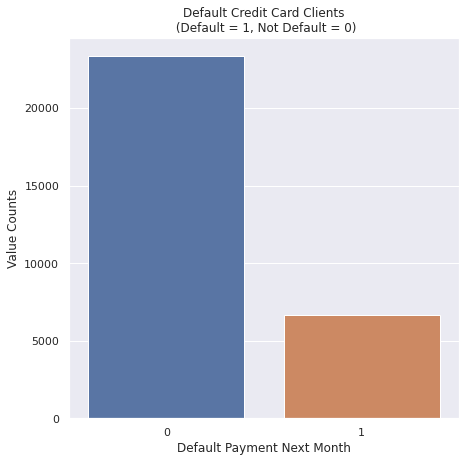

In [ ]:
default = df['default_pay'].value_counts()
fig,ax=plt.subplots(figsize=(7,7))
plt.title("Default Credit Card Clients\n (Default = 1, Not Default = 0)")
sns.barplot(x = default.index, y = default.values)
plt.ylabel('Value Counts')
plt.xlabel('Default Payment Next Month')
plt.show()

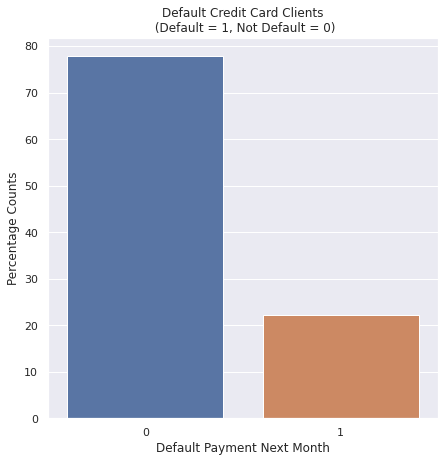

In [ ]:
default1 = df['default_pay'].value_counts(True)*100
fig,ax=plt.subplots(figsize=(7,7))
plt.title("Default Credit Card Clients\n (Default = 1, Not Default = 0)")
sns.barplot(x = default1.index, y = default1.values)
plt.ylabel('Percentage Counts')
plt.xlabel('Default Payment Next Month')
plt.show()

unbalanced data

# Data Visualitation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


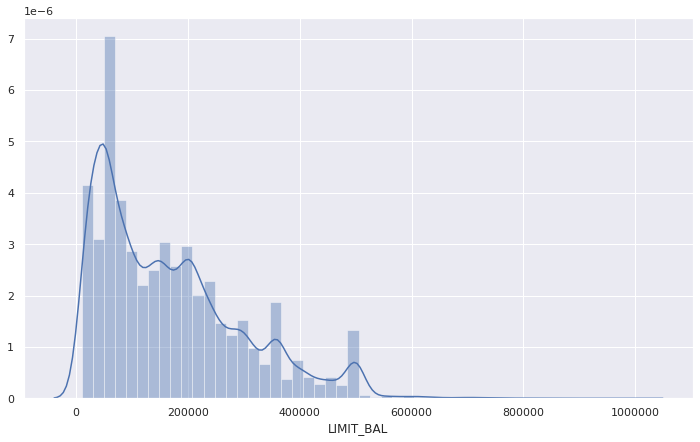

In [ ]:
plt.figure(figsize=(12,7))
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()

In [ ]:
df['LIMIT_BAL'].value_counts()

50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64

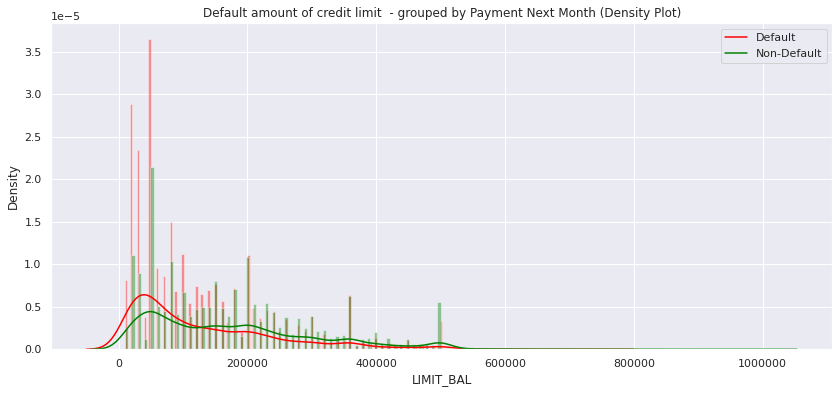

In [ ]:
class_0 = df.loc[df['default_pay'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default_pay'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.ticklabel_format(style='plain', axis='x')
plt.legend(['Default', 'Non-Default'])
plt.show()

Sebagian besar default adalah untuk batas kredit 0-100.000 (dan kepadatan untuk interval ini lebih besar untuk default daripada non-default). Jumlah default yang lebih besar adalah untuk jumlah 50.000, 20.000 dan 30.000

distribusi limit balance

Limit balance terbanyak terdapat pada balance 50000

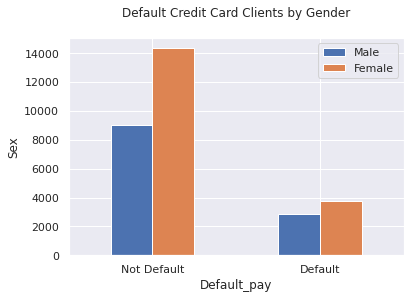

In [ ]:
pd.crosstab(df['default_pay'],df['SEX']).plot(kind='bar').set_xticklabels(["Not Default","Default"],rotation = 0)
plt.title('Default_pay by SEX')
plt.xlabel('Default_pay')
plt.ylabel('Sex')
plt.title("Default Credit Card Clients by Gender\n")
plt.legend(['Male', 'Female'])
plt.show()

pemegang kartu lebih banyak perempuan begitu pun juga dari penggunan gagal bayar juga pada perempuan


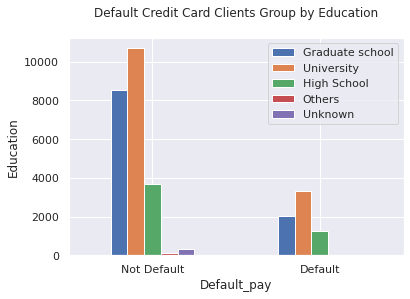

In [ ]:
pd.crosstab(df['default_pay'],df['EDUCATION']).plot(kind='bar').set_xticklabels(["Not Default","Default"],rotation = 0)
plt.title('Default_pay by Education')
plt.xlabel('Default_pay')
plt.ylabel('Education')
plt.title("Default Credit Card Clients Group by Education\n")
plt.legend(['Graduate school','University','High School', 'Others', 'Unknown'])
plt.show()

berdasar Education default banyak terdapat pada education tingakatan pendidikan University lalu grad scholl dan highschool



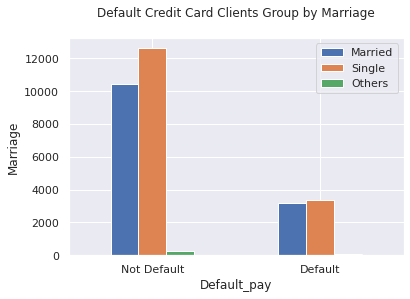

In [ ]:
pd.crosstab(df['default_pay'],df['MARRIAGE']).plot(kind='bar').set_xticklabels(["Not Default","Default"],rotation = 0)
plt.title('Default_pay by Education')
plt.xlabel('Default_pay')
plt.ylabel('Marriage')
plt.title("Default Credit Card Clients Group by Marriage\n")
plt.legend(['Married', 'Single', 'Others'])
plt.show()

tingakatan default pay pada status perkawinan

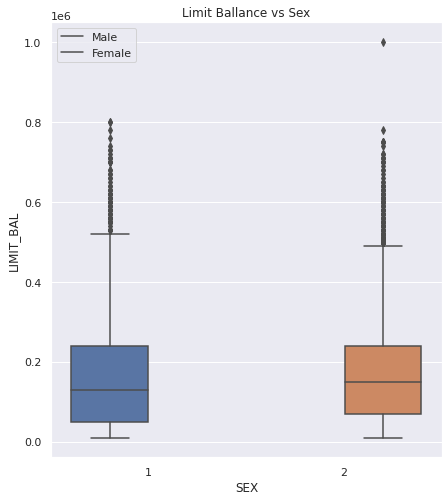

In [17]:
plt.figure(figsize = (7,8))
plt.title('Limit Ballance vs Sex')
sns.boxplot(x="SEX", y="LIMIT_BAL", hue="SEX",data = df)
plt.legend(['Male', 'Female'])
plt.show()

  Limit Balanced vs sex 

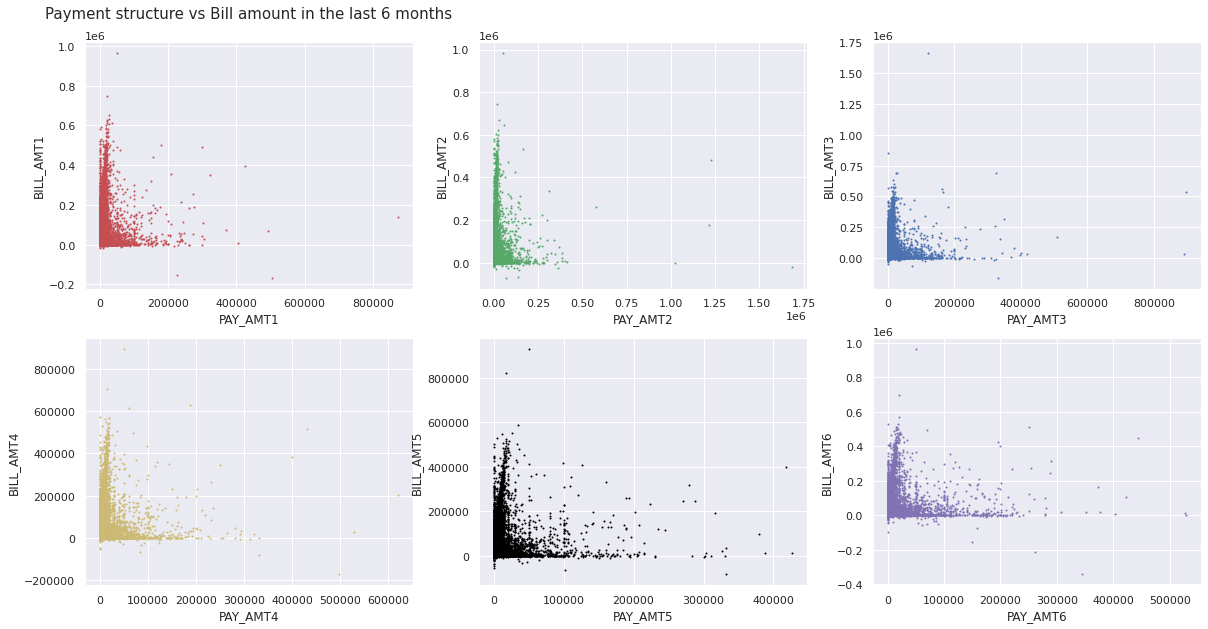

In [38]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')
plt.title('Payment structure vs Bill amount in the last 6 months\n', fontsize=15)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')


plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

pada plot di atas proporsi yang tagihannya tinggi tetapi membayarkan tagihanya, dibandingkan dengan sebalik , dmn ditunjukan dengan makin dekatny sebaran data pada Y mendekati X axis

# Correlation Analysis

In [ ]:
df_corr = df.corr()
df_corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
LIMIT_BAL,1.000000,0.024755,-0.221047,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014793,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.221047,0.014793,1.000000,-0.144653,0.174841,0.106735,0.123117,0.115549,0.110245,0.098970,0.083818,0.022906,0.018050,0.012395,-0.000827,-0.007793,-0.009216,-0.038374,-0.030365,-0.040644,-0.038652,-0.041745,-0.038743,0.028625
MARRIAGE,-0.108139,-0.031389,-0.144653,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.174841,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.106735,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.123117,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.115549,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.110245,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.098970,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


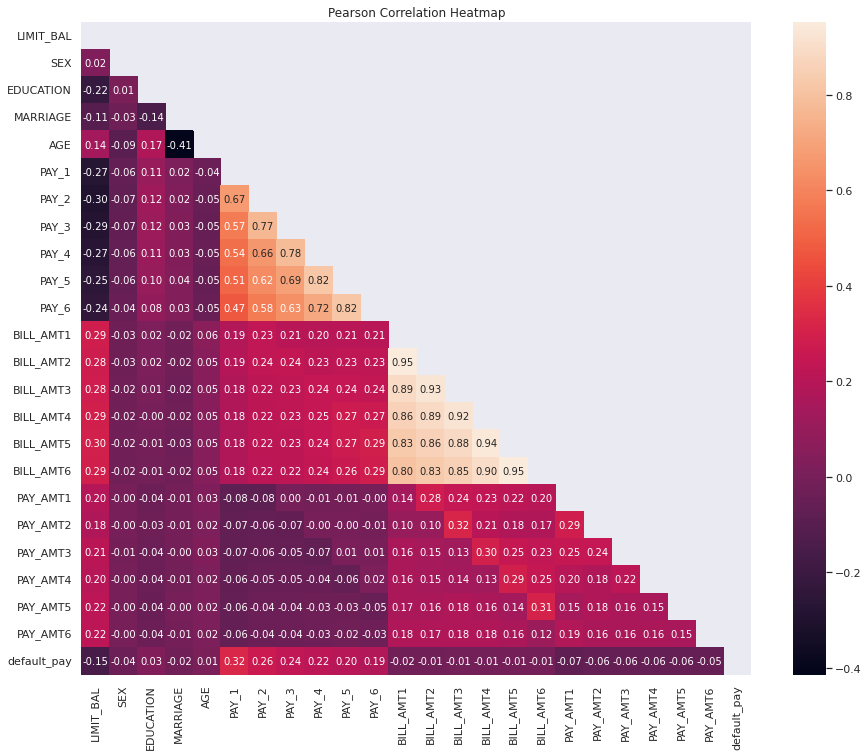

In [ ]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Balanced & Spliting data

In [22]:
scaler = MinMaxScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaler.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,0.010101,1.0,0.25,0.0,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,0.111111,1.0,0.25,0.5,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,0.080808,1.0,0.25,0.5,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,0.040404,1.0,0.25,0.0,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,0.040404,0.0,0.25,0.0,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0


In [23]:
target = df_scaler['default_pay'].value_counts().reset_index()
target.rename(columns={'index':'default_pay','default_pay':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,default_pay,freq,percentage
0,0.0,23364,77.88
1,1.0,6636,22.12


In [13]:
# X = df_scaler.drop(['default_pay'],axis=1)
# y = df_scaler['default_pay']
# X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [24]:
sm = over_sampling.SMOTE(random_state=42)
X = df_scaler.drop(['default_pay'],axis=1)
y = df_scaler['default_pay']
X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (30000, 23)
Shape of X after SMOTE: (46728, 23)

Balance of positive and negative classes (%):


1.0    50.0
0.0    50.0
Name: default_pay, dtype: float64

In [25]:
y_sm.value_counts()

1.0    23364
0.0    23364
Name: default_pay, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Modeling Random Forest

In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [28]:
pd.DataFrame(data = [accuracy_score(y_test, preds),
             recall_score(y_test,preds),
             precision_score(y_test,preds),
             roc_auc_score(y_test,preds),
             f1_score(y_test,preds)],
             index = ['accuracy','recall','precision','AUC','f1_score'],
             columns=['Score (%)'])

,Score (%)
accuracy,0.844975
recall,0.810848
precision,0.871334
AUC,0.845104
f1_score,0.840004


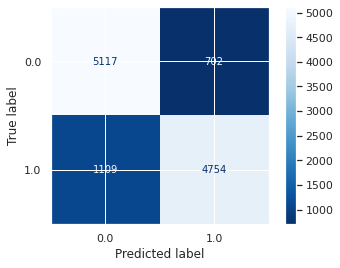

In [29]:
plot_confusion_matrix(model, X_test, y_test, cmap="Blues_r")
plt.show()

# Modeling Decision Tree

In [30]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20,
                       random_state=42)
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)

In [31]:
pd.DataFrame(data = [accuracy_score(y_test, preds2),
             recall_score(y_test,preds2),
             precision_score(y_test,preds2),
             roc_auc_score(y_test,preds2),
             f1_score(y_test,preds2)],
             index = ['accuracy','recall','precision','AUC','f1_score'],
             columns=['Score (%)'])

,Score (%)
accuracy,0.766307
recall,0.736824
precision,0.784456
AUC,0.766419
f1_score,0.759894


In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=model2, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 3.39 s, sys: 239 ms, total: 3.63 s
Wall time: 1min 1s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20,
                       random_state=42)

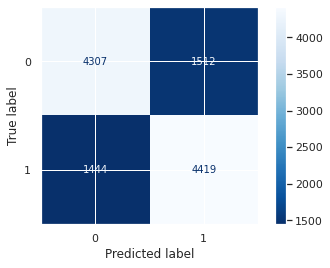

In [ ]:
plot_confusion_matrix(model2, X_test, y_test, cmap="Blues_r")
plt.show()

# Modeling Regresion

In [32]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)
preds3 = model3.predict(X_test)

In [33]:
pd.DataFrame(data = [accuracy_score(y_test, preds3),
             recall_score(y_test,preds3),
             precision_score(y_test,preds3),
             roc_auc_score(y_test,preds3),
             f1_score(y_test,preds3)],
             index = ['accuracy','recall','precision','AUC','f1_score'],
             columns=['Score (%)'])

,Score (%)
accuracy,0.667180
recall,0.645233
precision,0.676623
AUC,0.667263
f1_score,0.660555


In [ ]:
param_logreg = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [ ]:
grid_search = GridSearchCV(model3, 
                   param_grid = param_logreg,
                   scoring = 'accuracy', 
                   cv = 10)

In [ ]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 6min 46s, sys: 56.7 s, total: 7min 42s
Wall time: 6min 31s


GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_

LogisticRegression()

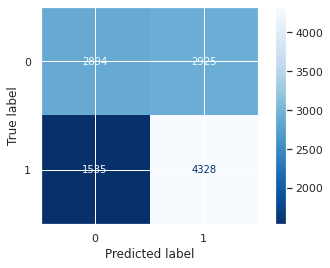

In [ ]:
plot_confusion_matrix(model3, X_test, y_test, cmap="Blues_r")
plt.show()

# XGboost

In [34]:
model_xgb = XGBClassifier(max_depth= 3, min_child_weight= 2, n_estimators= 50)
model_xgb.fit(X_train, y_train)
preds_XGB = model_xgb.predict(X_test)

In [35]:
pd.DataFrame(data = [accuracy_score(y_test, preds_XGB),
             recall_score(y_test,preds_XGB),
             precision_score(y_test,preds_XGB),
             roc_auc_score(y_test,preds_XGB),
             f1_score(y_test,preds_XGB)],
             index = ['accuracy','recall','precision','AUC','f1_score'],
             columns=['Score (%)'])

,Score (%)
accuracy,0.765451
recall,0.656831
precision,0.841013
AUC,0.765862
f1_score,0.737598


In [ ]:
params_xg = {'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}

In [ ]:
grid_search = GridSearchCV(estimator=model_xgb, 
                           param_grid=params_xg, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

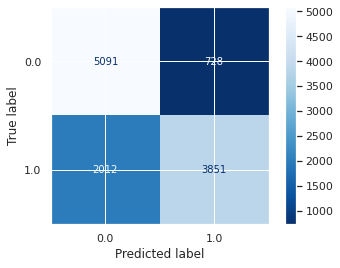

In [ ]:
plot_confusion_matrix(model_xgb, X_test, y_test, cmap="Blues_r")
plt.show()

# LightGBM

In [36]:
import lightgbm as lgb
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train, y_train)
preds_model_lgbm = model_lgbm.predict(X_test)

In [37]:
pd.DataFrame(data = [accuracy_score(y_test, preds_model_lgbm),
             recall_score(y_test,preds_model_lgbm),
             precision_score(y_test,preds_model_lgbm),
             roc_auc_score(y_test,preds_model_lgbm),
             f1_score(y_test,preds_model_lgbm)],
             index = ['accuracy','recall','precision','AUC','f1_score'],
             columns=['Score (%)'])

,Score (%)
accuracy,0.863808
recall,0.797203
precision,0.920804
AUC,0.864059
f1_score,0.854557


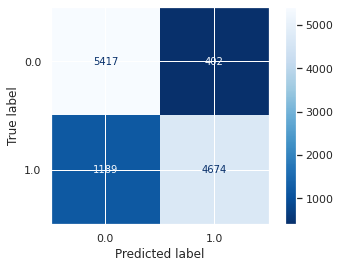

In [ ]:
plot_confusion_matrix(model_lgbm, X_test, y_test, cmap="Blues_r")
plt.show()

# Feature Importance for Best Model

In [44]:
feature_names = X_test.columns

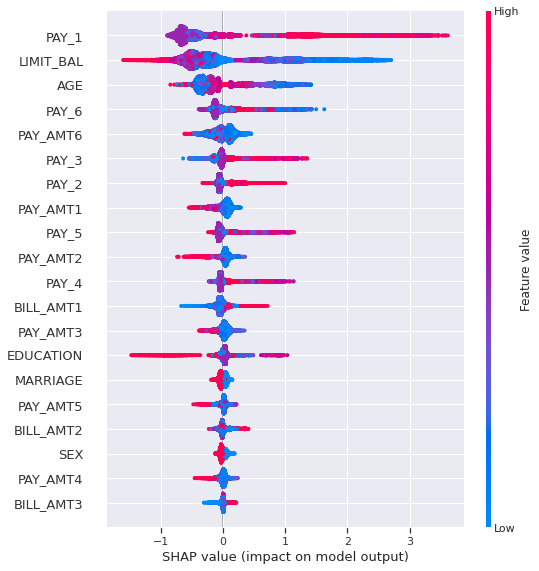

In [49]:
explainer = shap.TreeExplainer(model_lgbm)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[1], X_train_res)

Selected Model LightGBM

feature di urutkan secara desc berdasarkan feature importance
di dapatkan bahwa bagaimana penting ny feature dalam melakukan prediksi
dan pada visualisasi di atas, dapat di lihat bahwa Pay_1 adalah importance feature